In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

In [10]:
import umap.umap_ as umap
import umap.plot

umap.plot.output_notebook()

Loading BokehJS ...

In [4]:
import umap
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import pickle5 as pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib inline

In [19]:
from xgboost import XGBClassifier

In [ ]:
with open( "/mnt/vdb/thesis/trainingset2/set9/jax/AMPNonAMP.reps", 'rb') as file:
    AMPNonAMP_df = pickle.load(file)

with open( "/mnt/vdb/thesis/trainingset2/benchmark_set/jax/AMPNonAMP.benchmark_set.reps", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)

In [5]:
with open( "/mnt/vdb/thesis/trainingset2/set9/pssm/AMP/AMP.pssm.plk", 'rb') as file:
    AMPs_df = pickle.load(file)
AMPs_df["class"] = 0
with open( "/mnt/vdb/thesis/trainingset2/set9/pssm/nonAMP/nonAMP.pssm.plk", 'rb') as file:
    nonAMPs_df = pickle.load(file)   
nonAMPs_df["class"] = 1

AMPNonAMP_df = pd.concat([AMPs_df, nonAMPs_df], ignore_index=True)

#AMPs_df = AMPs_df[AMPs_df["length"] <= 300 ]
with open( "../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)

In [24]:
X_train = np.array(AMPNonAMP_df['reps'].to_list())
y_train = np.array(AMPNonAMP_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

In [6]:
X= np.array(AMPNonAMP_df['reps'].to_list())
y= np.array(AMPNonAMP_df['class'].to_list())

<AxesSubplot:>

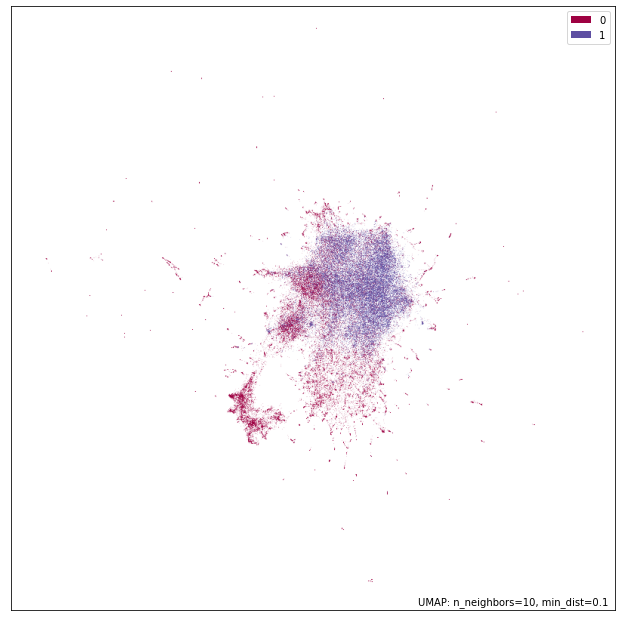

In [58]:
mapper = umap.UMAP(n_neighbors=10, random_state=42).fit(X)
umap.plot.points(mapper, labels=y)

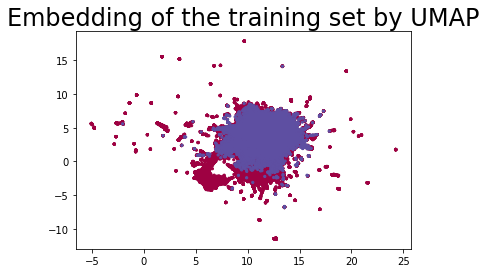

In [59]:
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s= 5, c=y, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [60]:
model = XGBClassifier( n_jobs=24, random_state=42, verbosity=1)
model.fit(mapper.embedding_,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [61]:
test_embedding = mapper.transform(X_test)

/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


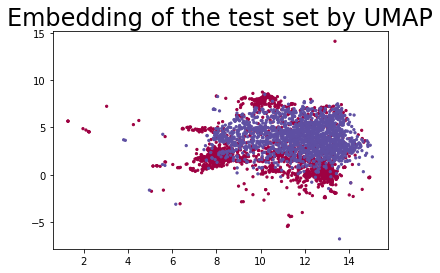

In [62]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24);

In [63]:
pred = model.predict(test_embedding)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1778
           1       0.75      0.79      0.77      1778

    accuracy                           0.76      3556
   macro avg       0.76      0.76      0.76      3556
weighted avg       0.76      0.76      0.76      3556

